In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
%matplotlib inline

In [4]:
data = pd.read_csv('/content/indian_liver_patient.csv')

In [5]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,17,Male,0.9,0.2,224,36,45,6.9,4.2,1.55,1
1,42,Female,0.8,0.2,168,25,18,6.2,3.1,1.00,1
2,30,Male,0.7,0.2,262,15,18,9.6,4.7,1.20,1
3,36,Male,5.3,2.3,145,32,92,5.1,2.6,1.00,2
4,75,Female,0.8,0.2,188,20,29,4.4,1.8,0.60,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         3000 non-null   int64  
 1   Gender                      3000 non-null   object 
 2   Total_Bilirubin             3000 non-null   float64
 3   Direct_Bilirubin            3000 non-null   float64
 4   Alkaline_Phosphotase        3000 non-null   int64  
 5   Alamine_Aminotransferase    3000 non-null   int64  
 6   Aspartate_Aminotransferase  3000 non-null   int64  
 7   Total_Protiens              3000 non-null   float64
 8   Albumin                     3000 non-null   float64
 9   Albumin_and_Globulin_Ratio  3000 non-null   float64
 10  Dataset                     3000 non-null   int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 257.9+ KB


In [7]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,44.879000,3.257833,1.453067,294.548667,82.768333,109.869333,6.470667,3.121367,0.938463,1.284000
std,16.134512,6.118309,2.731250,256.206339,197.413941,269.208577,1.104213,0.801994,0.309542,0.451012
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.000000,23.000000,25.000000,5.700000,2.500000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,210.000000,35.000000,42.000000,6.500000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,61.250000,88.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [9]:
data['Albumin_and_Globulin_Ratio'] = data['Albumin_and_Globulin_Ratio'].fillna(0.947064)

In [10]:
data.isnull().sum()

,0
Age,0
Gender,0
Total_Bilirubin,0
Direct_Bilirubin,0
Alkaline_Phosphotase,0
Alamine_Aminotransferase,0
Aspartate_Aminotransferase,0
Total_Protiens,0
Albumin,0
Albumin_and_Globulin_Ratio,0


In [14]:
data['Dataset'].value_counts()

,count
Dataset,
1,2148
2,852


In [16]:
data.shape

(3000, 11)

In [22]:
import seaborn as sns

Here 2 means suffering with disease and 1 means not suffering with disease.

Replacing 2 with 1 and 1 with 0, for better understanding.

In [21]:
data['Dataset'] = data['Dataset'].replace([2,1],[1,0])
data['Dataset'].head()

,Dataset
0,0
1,0
2,0
3,1
4,0


In [23]:
data = pd.get_dummies(data, columns = ['Gender'], drop_first = True)

In [24]:
data.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Male
0,17,0.9,0.2,224,36,45,6.9,4.2,1.55,0,True
1,42,0.8,0.2,168,25,18,6.2,3.1,1.00,0,False
2,30,0.7,0.2,262,15,18,9.6,4.7,1.20,0,True
3,36,5.3,2.3,145,32,92,5.1,2.6,1.00,1,True
4,75,0.8,0.2,188,20,29,4.4,1.8,0.60,0,False


<Axes: >

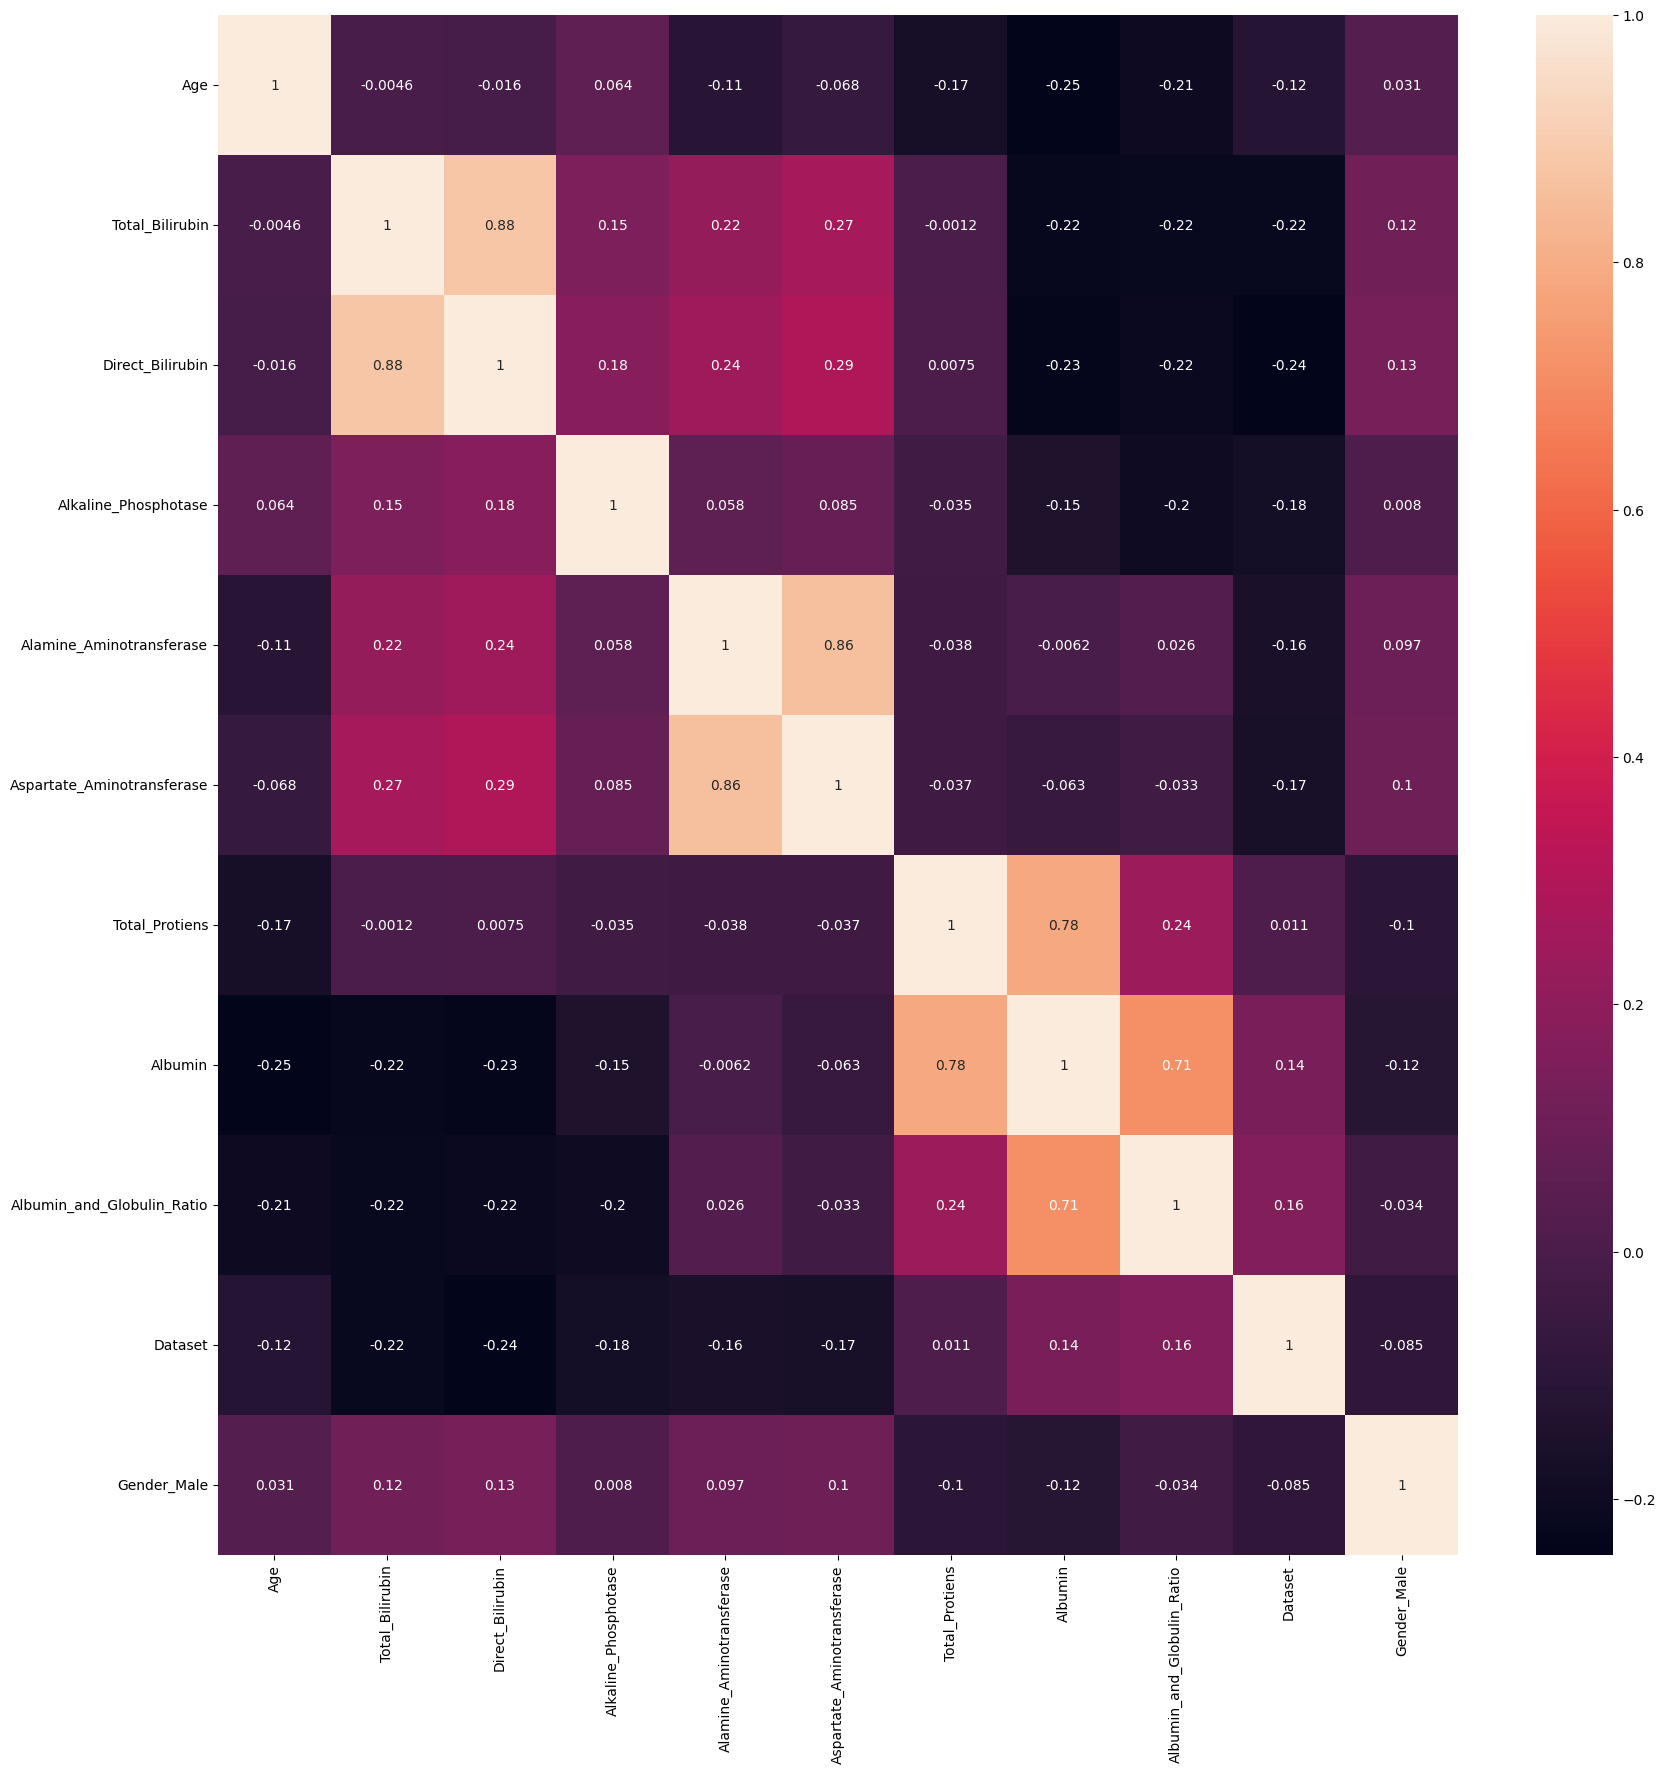

In [25]:
plt.figure(figsize = (20,20))
sns.heatmap(data.corr(), annot = True)

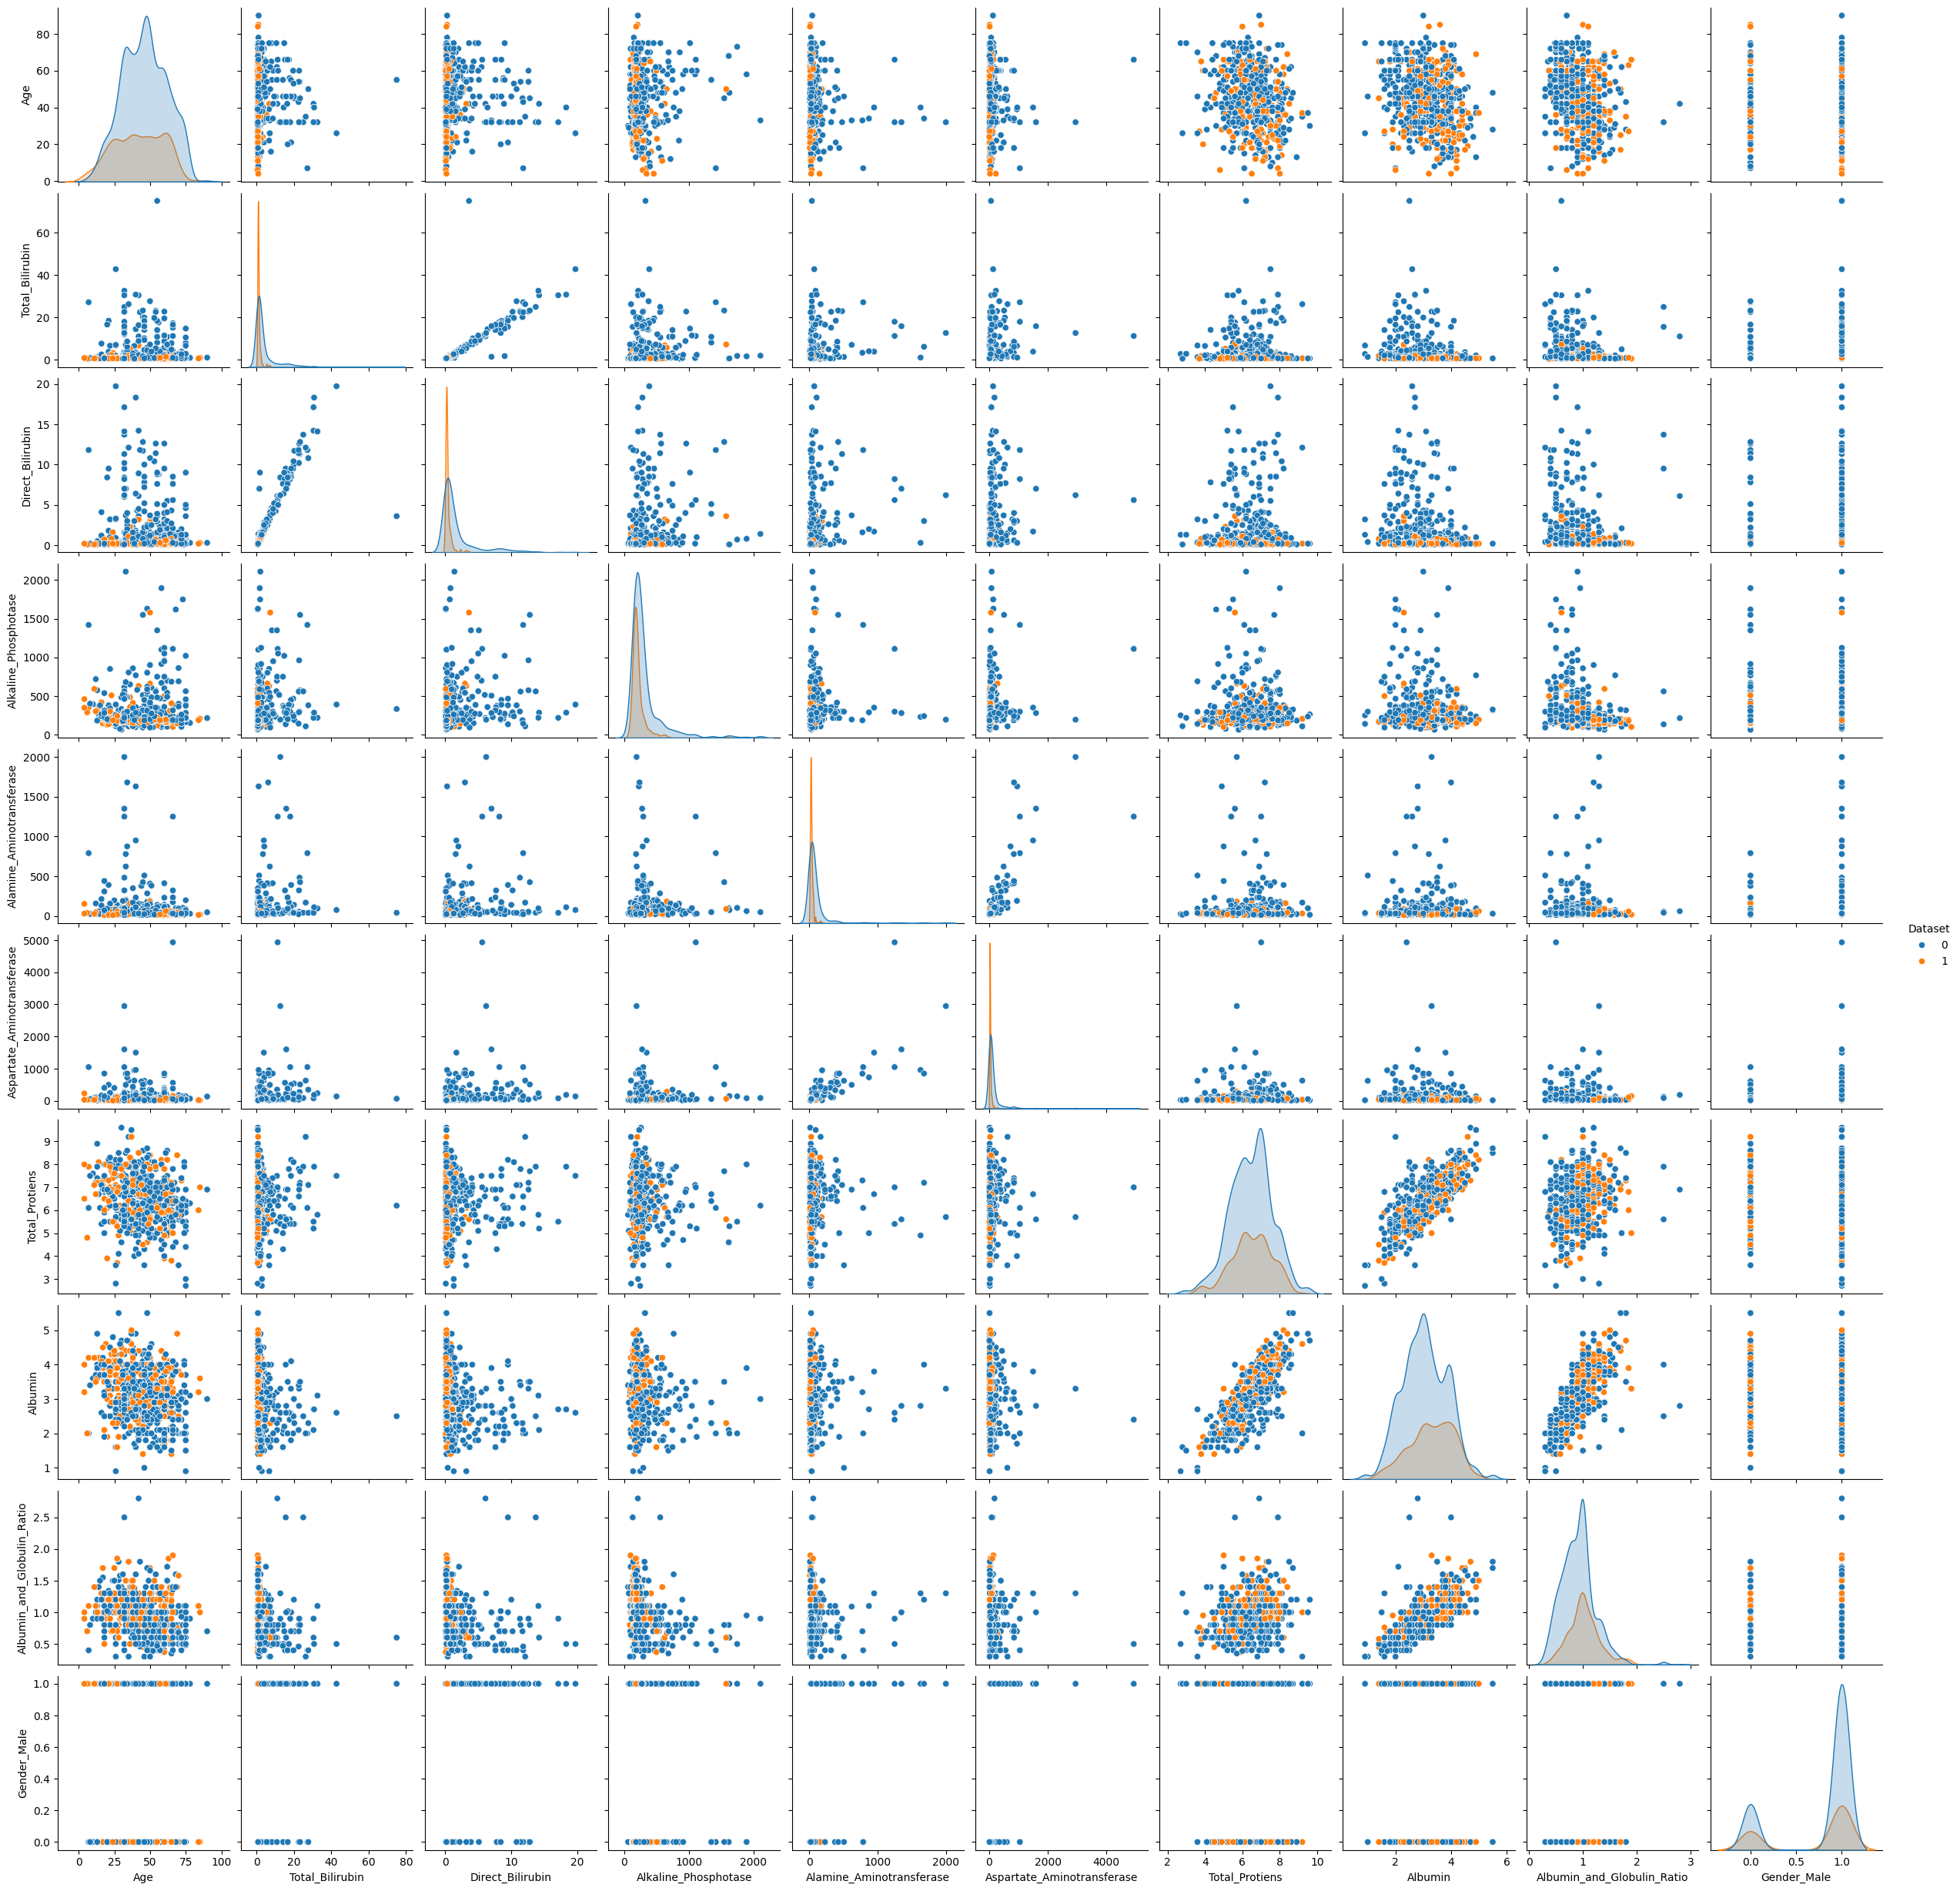

In [26]:
sns.pairplot(data, hue = 'Dataset')

In [27]:
data.corr()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Male
Age,1.000000,-0.004563,-0.015573,0.063697,-0.113943,-0.068129,-0.171770,-0.245296,-0.205448,-0.120280,0.031000
Total_Bilirubin,-0.004563,1.000000,0.878233,0.152890,0.219622,0.269002,-0.001151,-0.223750,-0.218950,-0.218484,0.118198
Direct_Bilirubin,-0.015573,0.878233,1.000000,0.178526,0.242307,0.293460,0.007497,-0.230913,-0.215453,-0.244059,0.129825
Alkaline_Phosphotase,0.063697,0.152890,0.178526,1.000000,0.058261,0.084680,-0.035351,-0.146660,-0.200887,-0.181157,0.008008
Alamine_Aminotransferase,-0.113943,0.219622,0.242307,0.058261,1.000000,0.856007,-0.037506,-0.006231,0.026401,-0.160721,0.096791
Aspartate_Aminotransferase,-0.068129,0.269002,0.293460,0.084680,0.856007,1.000000,-0.036707,-0.063285,-0.032807,-0.166737,0.103711
Total_Protiens,-0.171770,-0.001151,0.007497,-0.035351,-0.037506,-0.036707,1.000000,0.782158,0.236918,0.011042,-0.099818
Albumin,-0.245296,-0.223750,-0.230913,-0.146660,-0.006231,-0.063285,0.782158,1.000000,0.709664,0.137168,-0.116093
Albumin_and_Globulin_Ratio,-0.205448,-0.218950,-0.215453,-0.200887,0.026401,-0.032807,0.236918,0.709664,1.000000,0.164228,-0.033934
Dataset,-0.120280,-0.218484,-0.244059,-0.181157,-0.160721,-0.166737,0.011042,0.137168,0.164228,1.000000,-0.085043


In [28]:
# X = data[['Albumin_and_Globulin_Ratio', 'Albumin', 'Total_Protiens', 'Aspartate_Aminotransferase', 'Alamine_Aminotransferase', 'Alkaline_Phosphotase', 'Age']]
X = data.drop('Dataset', axis = 1)
y = data['Dataset']

In [29]:
X.columns

Index(['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio',
       'Gender_Male'],
      dtype='object')

In [35]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

In [39]:
print("Train Set: ", X_train.shape, y_train.shape)
print("Test Set: ", X_test.shape, y_test.shape)

Train Set:  (3866, 10) (3866,)
Test Set:  (430, 10) (430,)


In [40]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [41]:
from sklearn.neighbors import KNeighborsClassifier
model_2 = KNeighborsClassifier()
model_2.fit(X_train, y_train)

KNeighborsClassifier()

In [42]:
from sklearn.tree import DecisionTreeClassifier
model_3 = DecisionTreeClassifier()
model_3.fit(X_train, y_train)

DecisionTreeClassifier()

In [43]:
from sklearn.svm import SVC
model_4 = SVC()
model_4.fit(X_train, y_train)

SVC()

In [44]:
from sklearn.linear_model import LogisticRegression
model_5 = LogisticRegression()
model_5.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [45]:
y_pred = model.predict(X_test)

In [46]:
y_pred = (y_pred > 0.5).astype(int)  # For binary classification

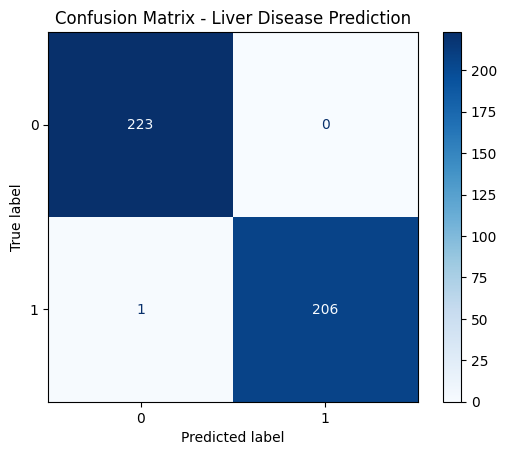

In [47]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Liver Disease Prediction")
plt.show()

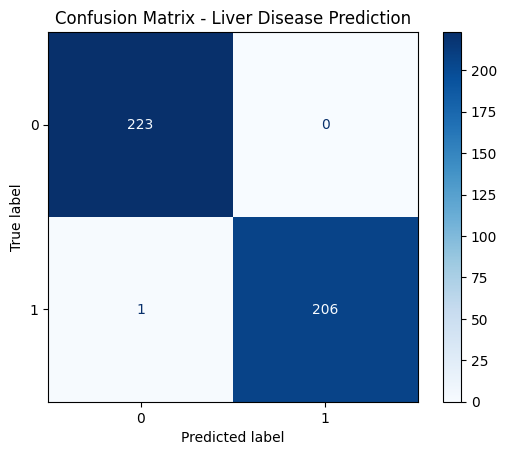

In [48]:
# Predictions
y_pred = model.predict(X_test)

# If y_pred is probabilities, convert to class labels (optional)
# y_pred = (y_pred > 0.5).astype(int)

# Evaluate
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Liver Disease Prediction")
plt.show()

In [49]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [50]:
confusion_matrix(y_test, model.predict(X_test))

array([[223,   0],
       [  1, 206]])

In [51]:
print("Accuracy is",(accuracy_score(y_test, model.predict(X_test))*100))

Accuracy is 99.76744186046511


In [52]:
print(accuracy_score(y_test, model_2.predict(X_test))*100)

96.74418604651163


In [53]:
print(accuracy_score(y_test, model_3.predict(X_test))*100)

99.53488372093024


In [54]:
print(accuracy_score(y_test, model_4.predict(X_test))*100)

65.34883720930232


In [55]:
print(accuracy_score(y_test, model_5.predict(X_test))*100)

70.93023255813954


In [72]:
input_data = (75,0.8,0.2,188,20,29,4.4,1.8,0.6,1)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model_5.predict(input_data_reshaped) # Changed classifier to model_5
print(prediction)

if (prediction[0] == 0):
  print('The person is not liver disease')
else:
  print('The person is liver disease')

[1]
The person is liver disease


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


--- Training Logistic Regression ---


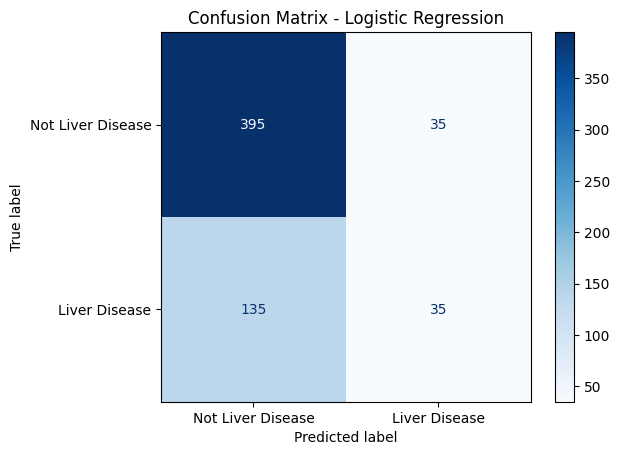

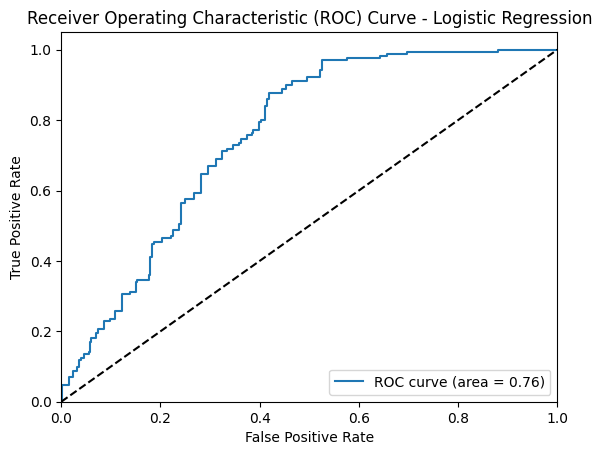

--- Training K-Nearest Neighbors (KNN) ---


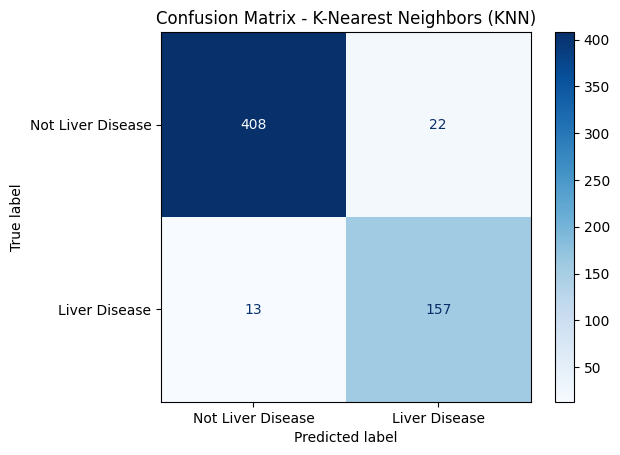

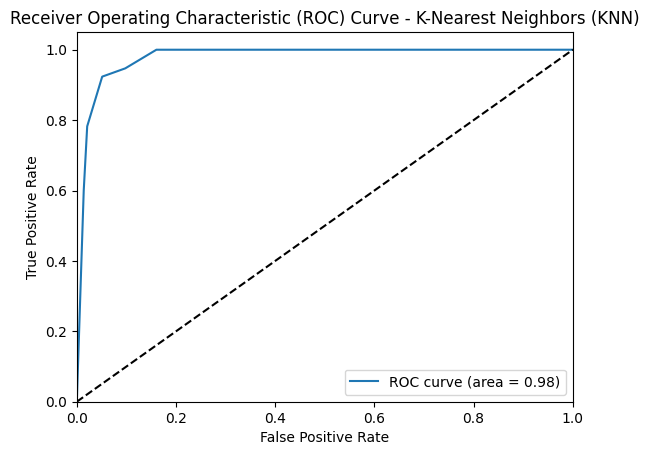

--- Training Stochastic Gradient Descent (SGD) ---


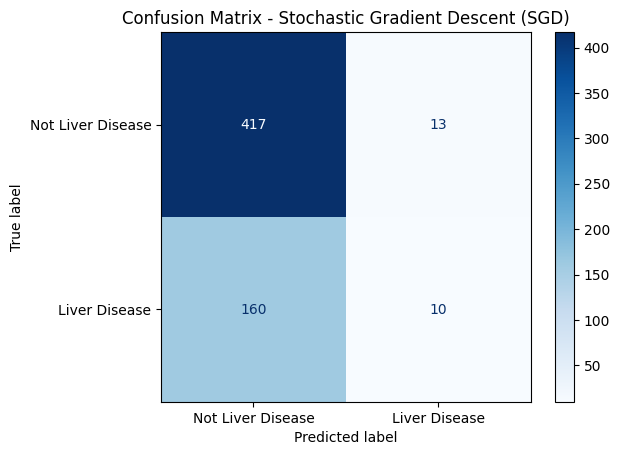

--- Training Support Vector Machine (SVM) ---


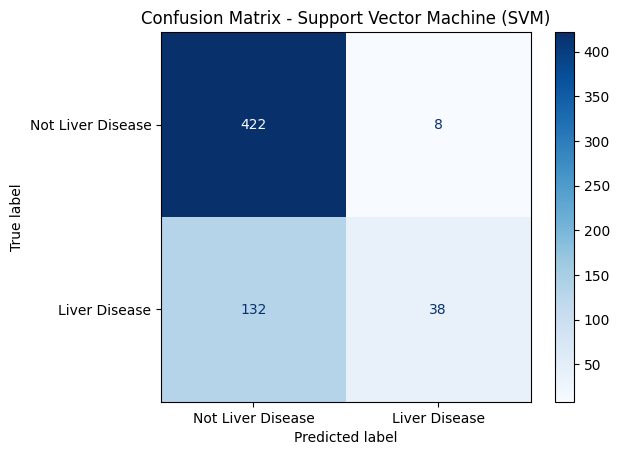

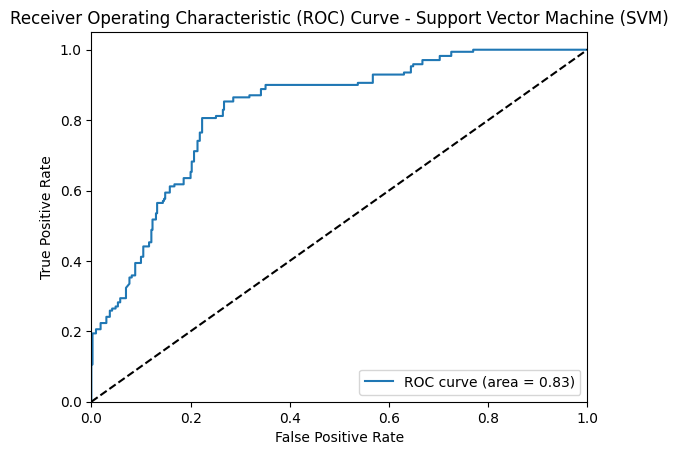

--- Training Naive Bayes ---


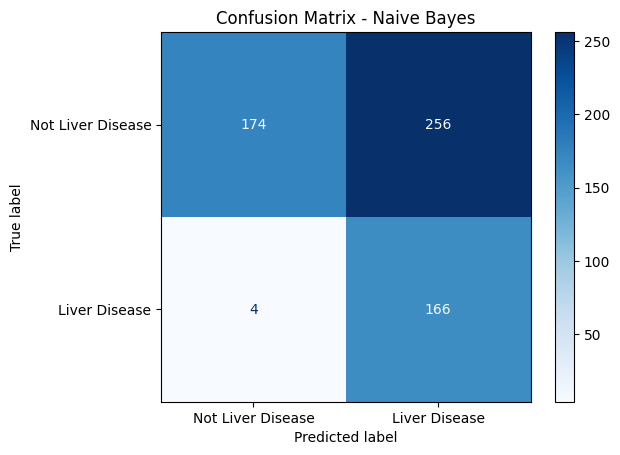

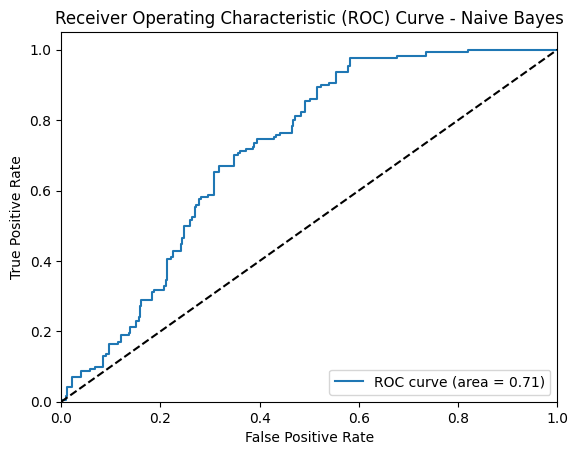

--- Training Decision Tree ---


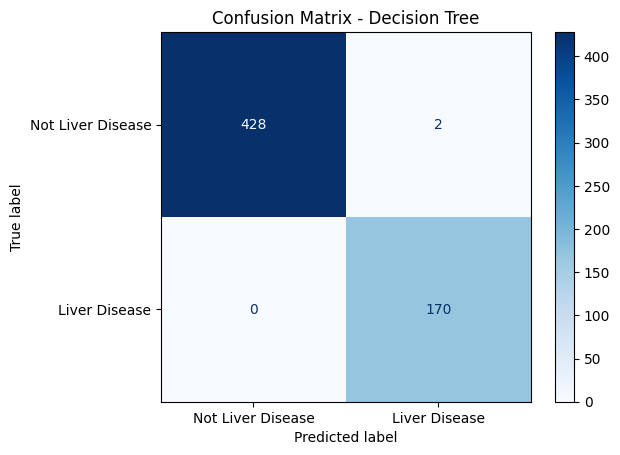

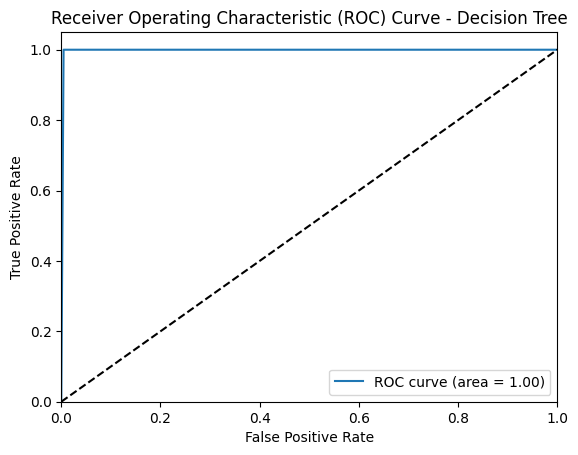

--- Training Random Forest ---


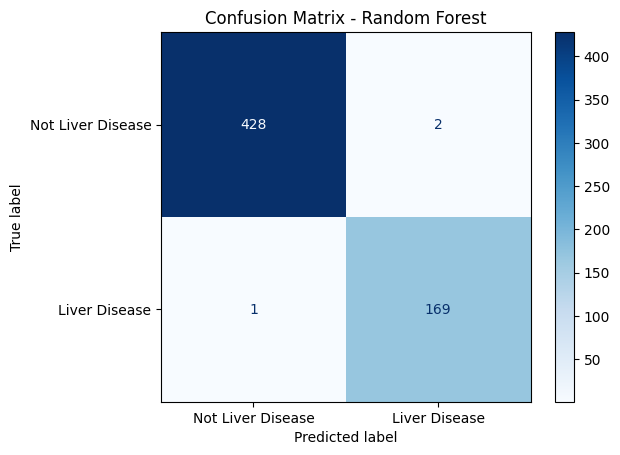

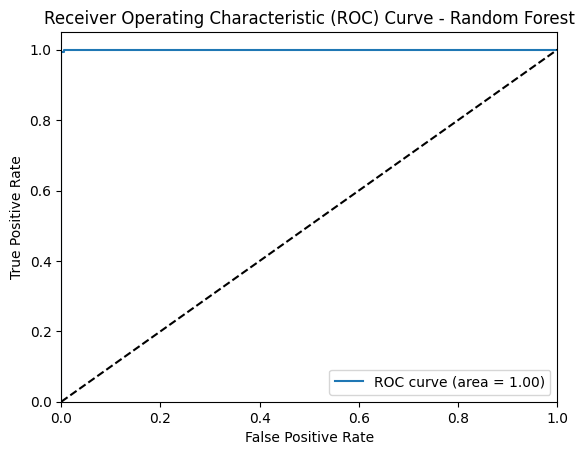

--- Training XGBoost ---


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [11:21:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


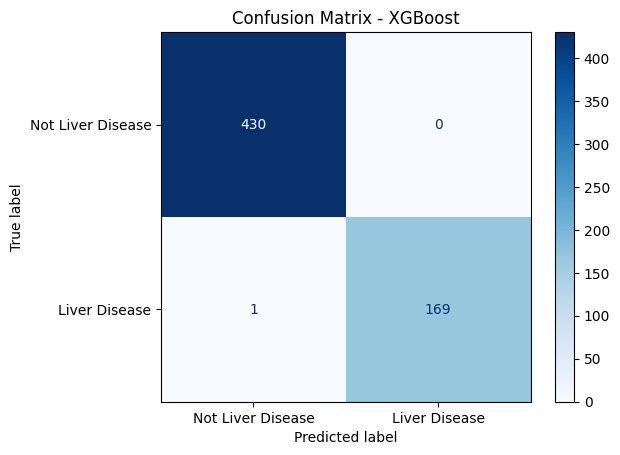

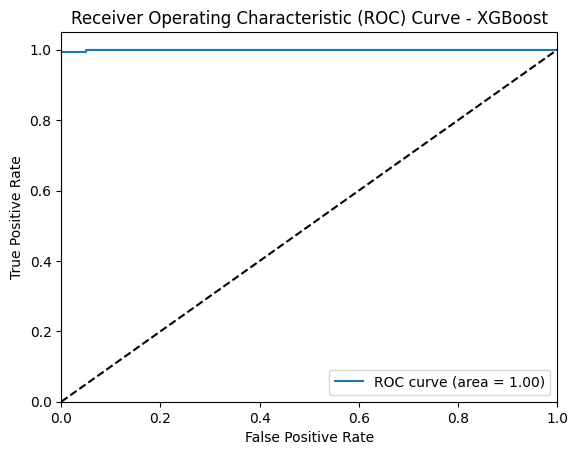



--- Model Performance Summary ---
                                   Accuracy Precision    Recall  F1 Score  \
Logistic Regression                0.716667       0.5  0.205882  0.291667   
K-Nearest Neighbors (KNN)          0.941667  0.877095  0.923529  0.899713   
Stochastic Gradient Descent (SGD)  0.711667  0.434783  0.058824  0.103627   
Support Vector Machine (SVM)       0.766667  0.826087  0.223529  0.351852   
Naive Bayes                        0.566667  0.393365  0.976471  0.560811   
Decision Tree                      0.996667  0.988372       1.0  0.994152   
Random Forest                         0.995  0.988304  0.994118  0.991202   
XGBoost                            0.998333       1.0  0.994118   0.99705   

                                    ROC-AUC  
Logistic Regression                0.756375  
K-Nearest Neighbors (KNN)           0.97896  
Stochastic Gradient Descent (SGD)       N/A  
Support Vector Machine (SVM)       0.828126  
Naive Bayes                        0.714

In [74]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve

# Import the models
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import matplotlib.pyplot as plt

# --- 1. Load and Prepare the Data ---
# Load your dataset from a CSV file
# Make sure the target variable (what you want to predict) is in a column named 'Outcome'
try:
    df = pd.read_csv('/content/indian_liver_patient.csv')
except FileNotFoundError:
    print("Error: 'indian_liver_patient.csv' not found. Please replace with the actual path to your data.")
    # As a placeholder, creating a dummy dataframe
    from sklearn.datasets import make_classification
    X, y = make_classification(n_samples=208, n_features=60, n_informative=10, n_redundant=10, random_state=42)
    df = pd.DataFrame(X)
    df['Outcome'] = y # Changed 'target' to 'Outcome'

# Map the target variable to 0 and 1
df['Dataset'] = df['Dataset'].replace([2,1],[1,0])

# Handle categorical features - One-Hot Encoding for 'Gender'
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)

# Separate features (X) and the target variable (y)
X = df.drop('Dataset', axis=1) # Changed 'Outcome' to 'Dataset'
y = df['Dataset'] # Changed 'Outcome' to 'Dataset'

# --- 2. Split the Data into Training and Testing Sets ---
# This divides the data so you can train the model on one part and test its performance on another.
# test_size=0.2 means 20% of the data will be used for testing.
# random_state ensures the split is the same every time you run the code.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # Added stratify

# --- 3. Scale the Features (Optional but Recommended) ---
# Scaling standardizes the feature values (e.g., mean=0, std=1), which helps many models perform better.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# --- 4. Initialize and Train the Models ---

# Create a dictionary to hold all the models you want to train
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors (KNN)": KNeighborsClassifier(),
    "Stochastic Gradient Descent (SGD)": SGDClassifier(),
    "Support Vector Machine (SVM)": SVC(probability=True), # probability=True is needed for ROC-AUC
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Loop through each model, train it, and store its performance
results = {}
for name, model in models.items():
    print(f"--- Training {name} ---")

    # Train the model on the (scaled) training data
    model.fit(X_train_scaled, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else None

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0) # Added zero_division
    recall = recall_score(y_test, y_pred, zero_division=0) # Added zero_division
    f1 = f1_score(y_test, y_pred, zero_division=0) # Added zero_division
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else 'N/A'


    # Store the results
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC-AUC": roc_auc
    }

    # Display Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Liver Disease', 'Liver Disease']) # Updated display labels
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

    # Display ROC Curve
    if y_pred_proba is not None and roc_auc != 'N/A':
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        plt.figure()
        plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Receiver Operating Characteristic (ROC) Curve - {name}')
        plt.legend(loc="lower right")
        plt.show()


# --- 5. Display the Results ---
print("\n\n--- Model Performance Summary ---")
results_df = pd.DataFrame(results).T
print(results_df)

In [75]:
import pickle

In [ ]:
filename = 'indian_liver_patient.sav'
pickle.dump(model, open(filename, 'wb'))

In [78]:
loaded_model = pickle.load(open('indian_liver_patient.sav', 'rb'))

In [79]:
for column in X.columns:
  print(column)

Age
Total_Bilirubin
Direct_Bilirubin
Alkaline_Phosphotase
Alamine_Aminotransferase
Aspartate_Aminotransferase
Total_Protiens
Albumin
Albumin_and_Globulin_Ratio
Gender_Male
